In [415]:
#Imports

import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib


In [437]:
#Lectura del fichero

df = pd.read_csv('/home/nacho/TFM/dataset')
df.head()
#df['Type2'] = pd.to_numeric(df['Type2'])


,ids,Date,Time,Type2,Traffic,Prefix,Duration,type_cust
0,89647946,20171224,1900,Llamada internacional zona 1,VOICE_MO,40,22,2
1,89647946,20171224,1901,Llamada internacional zona 1,VOICE_MO,40,1134,2
2,89647946,20171225,1259,Llamada internacional zona 1,VOICE_MO,40,2125,2
3,89647946,20171227,1928,Llamada internacional zona 1,VOICE_MO,40,3354,2
4,89647946,20180107,1123,Llamada internacional zona 1,VOICE_MO,40,1537,2


In [438]:
#Hashing customer_ids para generar un fichero sin ids reales

ids = df['ids'].astype(str).values.tolist()
hashed_ids = [abs(hash(i)) % (10 ** 8) for i in ids]

df['hashed_ids'] = hashed_ids
df_hashed = df
df_hashed.drop(['ids'], axis=1, inplace=True)


In [436]:
df_hashed.to_csv('/home/nacho/TFM/ficheros/dataset_hashed') #Export it as a csv

In [439]:
#Formateo de fechas para visualización de datos

dates = df_hashed['Date'].astype(str).values.tolist()
df_hashed['Dur_min'] = df['Duration']/60
dates_formated = []
months_formated = []
years_formated = []
for i in dates:
    dates_formated.append((dt.datetime.strptime((i[:4] + i[4:6] + i[6:]),"%Y%m%d" )).isoweekday())
    months_formated.append((dt.datetime.strptime((i[:4] + i[4:6] + i[6:]),"%Y%m%d" )).month)
    years_formated.append((dt.datetime.strptime((i[:4] + i[4:6] + i[6:]),"%Y%m%d" )).year)

dates_formated
df_hashed['weekday'] = dates_formated
df_hashed['Month'] = months_formated
df_hashed['Year'] = years_formated
df_hashed.head()

,Date,Time,Type2,Traffic,Prefix,Duration,type_cust,hashed_ids,Dur_min,weekday,Month,Year
0,20171224,1900,Llamada internacional zona 1,VOICE_MO,40,22,2,45437980,0.366667,7,12,2017
1,20171224,1901,Llamada internacional zona 1,VOICE_MO,40,1134,2,45437980,18.900000,7,12,2017
2,20171225,1259,Llamada internacional zona 1,VOICE_MO,40,2125,2,45437980,35.416667,1,12,2017
3,20171227,1928,Llamada internacional zona 1,VOICE_MO,40,3354,2,45437980,55.900000,3,12,2017
4,20180107,1123,Llamada internacional zona 1,VOICE_MO,40,1537,2,45437980,25.616667,7,1,2018


In [440]:
df_hashed.describe()

,Date,Time,Prefix,Duration,type_cust,hashed_ids,Dur_min,weekday,Month,Year
count,1.337780e+05,133778.000000,133778.000000,133778.000000,133778.000000,1.337780e+05,133778.000000,133778.000000,133778.000000,133778.000000
mean,2.017713e+07,1517.019181,114.349676,192.445462,0.885048,4.989398e+07,3.207424,3.914694,6.317092,2017.648604
std,4.475096e+03,518.819738,158.500938,419.532131,0.993375,2.852132e+07,6.992202,1.987426,3.452677,0.477408
min,2.017083e+07,0.000000,1.000000,1.000000,0.000000,5.338000e+03,0.016667,1.000000,1.000000,2017.000000
25%,2.017113e+07,1209.000000,33.000000,9.000000,0.000000,2.522173e+07,0.150000,2.000000,3.000000,2017.000000
50%,2.018023e+07,1552.000000,44.000000,45.000000,0.000000,5.041773e+07,0.750000,4.000000,6.000000,2018.000000
75%,2.018051e+07,1924.000000,57.000000,180.000000,2.000000,7.408483e+07,3.000000,6.000000,10.000000,2018.000000
max,2.018072e+07,2359.000000,998.000000,9611.000000,2.000000,9.999641e+07,160.183333,7.000000,12.000000,2018.000000


(array([1.08637e+05, 1.21910e+04, 5.20800e+03, 2.83000e+03, 1.66500e+03,
        9.82000e+02, 6.18000e+02, 4.29000e+02, 2.91000e+02, 2.46000e+02,
        1.82000e+02, 1.12000e+02, 7.40000e+01, 8.30000e+01, 4.40000e+01,
        3.70000e+01, 3.90000e+01, 2.40000e+01, 2.30000e+01, 1.00000e+01,
        1.20000e+01, 9.00000e+00, 5.00000e+00, 6.00000e+00, 3.00000e+00,
        2.00000e+00, 4.00000e+00, 4.00000e+00, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        3.00000e+00]),
 array([1.66666667e-02, 4.46574074e+00, 8.91481481e+00, 1.33638889e+01,
        1.78129630e+01, 2.22620370e+01, 2.67111111e+01, 3.11601852e+01,
        3.56092593e+01, 4.00583333e+01, 4.45074074e+01, 4.89564815e+01,
        5.34055556e+01, 5.78546296e+01, 6.23037037e+01, 6.67527778e+01,
        7.12018519e+01, 7.56509259e+01, 8.01000000e+01, 8.45490741e+01,
        8.89981481e+01, 9.34472222e+01, 9.78962963e+01, 1.02345370e+02,
        1.06794444e+02, 1.11243519

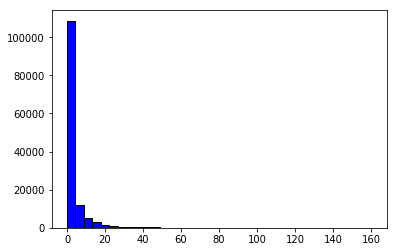

In [441]:
#Llamadas por duración

plt.hist(df_hashed['Dur_min'], color = 'blue', edgecolor = 'black',
bins = int(180/5))

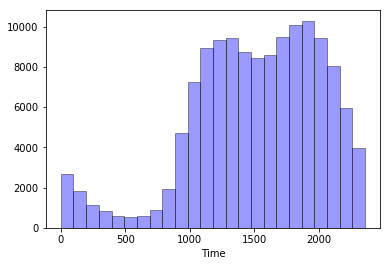

In [442]:
#Llamadas por hora

sns.distplot(df_hashed['Time'], hist=True, kde=False, 
             bins=int(2400/100), color = 'blue',
hist_kws={'edgecolor':'black'})

/home/nacho/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


([array([7.96313628e-04, 3.28977947e-05, 7.68225678e-06, 3.09410844e-06,
         1.04100845e-06, 5.01226289e-07, 2.60252112e-07, 1.25306572e-07,
         4.81948355e-08, 4.81948355e-08, 0.00000000e+00, 4.81948355e-08]),
  array([9.41100553e-04, 3.79389745e-05, 8.91604457e-06, 3.69172440e-06,
         1.18559295e-06, 5.68699059e-07, 2.89169013e-07, 1.25306572e-07,
         5.78338026e-08, 4.81948355e-08, 0.00000000e+00, 4.81948355e-08]),
  array([1.03303702e-03, 4.20258966e-05, 9.97633095e-06, 4.00017135e-06,
         1.31089953e-06, 6.26532862e-07, 3.08446947e-07, 1.44584507e-07,
         5.78338026e-08, 6.74727697e-08, 0.00000000e+00, 4.81948355e-08]),
  array([1.17783359e-03, 5.03925200e-05, 1.22511272e-05, 4.80984459e-06,
         1.82176478e-06, 8.28951171e-07, 3.75919717e-07, 1.83140375e-07,
         8.67507039e-08, 6.74727697e-08, 0.00000000e+00, 4.81948355e-08])],
 array([1.00000000e+00, 8.01833333e+02, 1.60266667e+03, 2.40350000e+03,
        3.20433333e+03, 4.00516667e+03, 4.8

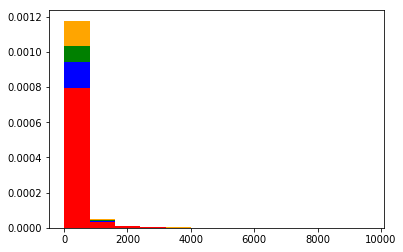

In [443]:
# Tráfico por tipo de destino

x1 = list(df_hashed[df_hashed['Type2'] == 'Llamada internacional zona 1']['Duration'])
x2 = list(df_hashed[df_hashed['Type2'] == 'Llamada internacional zona 2']['Duration'])
x3 = list(df_hashed[df_hashed['Type2'] == 'Llamada internacional zona 3']['Duration'])
x4 = list(df_hashed[df_hashed['Type2'] == 'Llamada internacional zona 4']['Duration'])

colors = ['red', 'blue', 'green', 'orange']
names = ['Llamada a Zona1', 'Llamada a zona 2', 'Llamada a zona 3',
         'Llamada a zona 4']
         
plt.hist([x1, x2, x3, x4], bins = int(180/15), normed=True,
         color = colors, stacked=True)


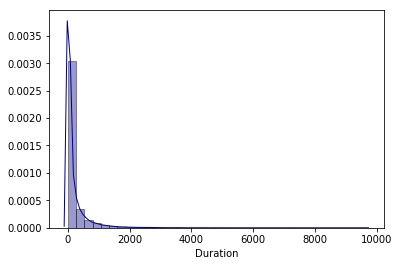

In [444]:
# Grafica de densidad basada en la duración de la llamada

sns.distplot(df_hashed['Duration'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

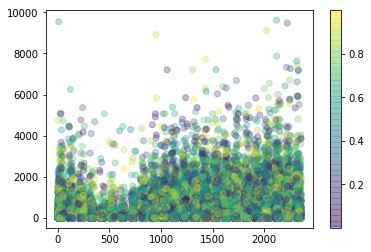

In [445]:
#Scatterplot sobre hora de llamada y duración en segundos

x = df_hashed['Time']
y = df_hashed['Duration']
colors = rng.rand(len(df_hashed['Duration']))
sizes = df_hashed['Duration']

plt.scatter(x, y, c=colors, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

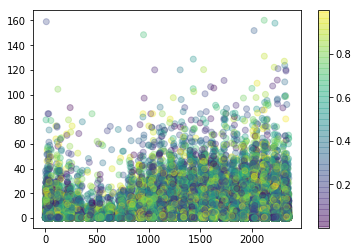

In [446]:
#Scatterplot sobre hora de llamada y duración en minutos

x = df_hashed['Time']
y = df_hashed['Dur_min']
colors = rng.rand(len(df_hashed['Dur_min']))
sizes = df_hashed['Dur_min']

plt.scatter(x, y, c=colors, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

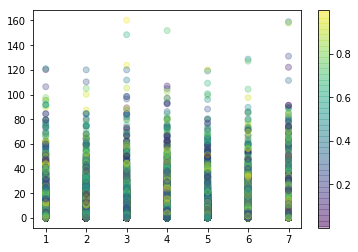

In [447]:
#Scatterplot sobre dia de la semana y duración en minutos
x = df_hashed['weekday']
y = df_hashed['Dur_min']
colors = rng.rand(len(df_hashed['Dur_min']))
sizes = df_hashed['Dur_min']

plt.scatter(x, y, c=colors, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

([array([0.12005553, 0.11963226, 0.11149107, 0.11476015, 0.11963226,
         0.10423244, 0.09693779]),
  array([0.14178638, 0.13976009, 0.13164591, 0.13486096, 0.14015634,
         0.12371186, 0.11675042]),
  array([0.15506985, 0.15253923, 0.14520856, 0.14736093, 0.15434038,
         0.13561745, 0.12975471]),
  array([0.17609825, 0.17482844, 0.16523733, 0.16695742, 0.17594515,
         0.15586235, 0.15173772])],
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 4 Lists of Patches objects>)

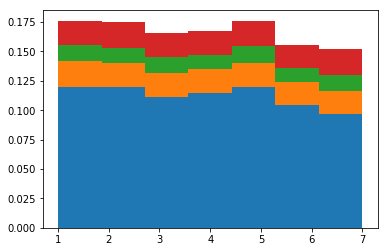

In [448]:
#Tipo de tráfico (destino) basado en el día de la semana

x1 = list(df_hashed[df_hashed['Type2'] == 'Llamada internacional zona 1']['weekday'])
x2 = list(df_hashed[df_hashed['Type2'] == 'Llamada internacional zona 2']['weekday'])
x3 = list(df_hashed[df_hashed['Type2'] == 'Llamada internacional zona 3']['weekday'])
x4 = list(df_hashed[df_hashed['Type2'] == 'Llamada internacional zona 4']['weekday'])

plt.hist([x1,x2,x3,x4], bins=7, density=True, stacked=True)

([array([8.40310361e-05, 5.42667719e-05, 3.15705388e-05, 2.57590466e-05,
         2.18323626e-05, 2.30103678e-05, 1.78271450e-05, 3.69108289e-05,
         1.09161813e-04, 2.80365233e-04, 4.37196989e-04, 5.37798631e-04,
         5.37798631e-04, 5.24133771e-04, 4.62170698e-04, 4.21411719e-04,
         4.36333118e-04, 4.85887869e-04, 5.22327496e-04, 5.36856227e-04,
         4.84081595e-04, 3.91883056e-04, 2.55312989e-04, 1.42774228e-04]),
  array([1.04057124e-04, 6.94237719e-05, 4.34291243e-05, 3.18061398e-05,
         2.48166424e-05, 2.59946476e-05, 2.30103678e-05, 4.87694144e-05,
         1.29502036e-04, 3.28427844e-04, 5.13845859e-04, 6.28033828e-04,
         6.32117579e-04, 6.14604569e-04, 5.38898102e-04, 5.05207154e-04,
         5.05678356e-04, 5.70154506e-04, 6.16567911e-04, 6.23321807e-04,
         5.67955563e-04, 4.65626180e-04, 3.13270844e-04, 1.73873564e-04]),
  array([1.42067425e-04, 8.94498599e-05, 5.70154506e-05, 4.42929947e-05,
         3.05496010e-05, 3.04710673e-05, 3.1570

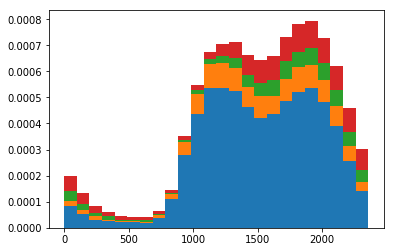

In [449]:
#Tipo de tráfico (destino) basado en la hora del día

x1 = list(df_hashed[df_hashed['Type2'] == 'Llamada internacional zona 1']['Time'])
x2 = list(df_hashed[df_hashed['Type2'] == 'Llamada internacional zona 2']['Time'])
x3 = list(df_hashed[df_hashed['Type2'] == 'Llamada internacional zona 3']['Time'])
x4 = list(df_hashed[df_hashed['Type2'] == 'Llamada internacional zona 4']['Time'])

plt.hist([x1,x2,x3,x4], bins=24, density=True, stacked=True)

In [450]:
#Clientes con más llamadas

id_grouped = df_hashed['Duration'].groupby(df['ids'])
id_grouped.count().sort_values(ascending=False).head(10)

KeyError: 'ids'

In [ ]:
#Llamadas por dia de la semana a diferentes destinos

grouped_weekday = df_hashed.groupby(['weekday' , 'Type2'])
grouped_weekday['Type2'].agg('count').plot.bar(stacked=True)

In [ ]:
df_hashed.groupby('Type2').weekday.value_counts().unstack(0).plot.bar()

In [ ]:
#Llamadas por destino basadas en el año

df_hashed.groupby('Type2').Year.value_counts().unstack(0).plot.bar()

In [ ]:
#Llamadas por destino basadas en mes

df_hashed.groupby(['Type2', 'Year']).Month.value_counts().unstack(0).plot.bar()